In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,  OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler,  OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV , RepeatedKFold#GridSearch is for hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import ttest_ind
from sklearn.tree import plot_tree
from scipy import stats

In [236]:
# import dataset
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/Fraud_Detection_Dataset.csv')

In [237]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No


In [238]:
# check if there is any NA value
df.isnull().sum()

Transaction ID                 0
Customer ID                    0
Transaction Amount             0
Transaction Date and Time      0
Merchant Category              0
Location                       0
Previous Transaction Amount    0
Time Since Last Transaction    0
Device Type                    0
Fraud                          0
dtype: int64

In [239]:
df = df.drop(columns=['Transaction ID', 'Customer ID'])

In [240]:
# recreate our time of day values
df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'])

In [241]:
# Create a new column that indicate the hour in a day that the transaction occurs
df['hour'] = df['Transaction Date and Time'].apply(lambda x:x.hour)

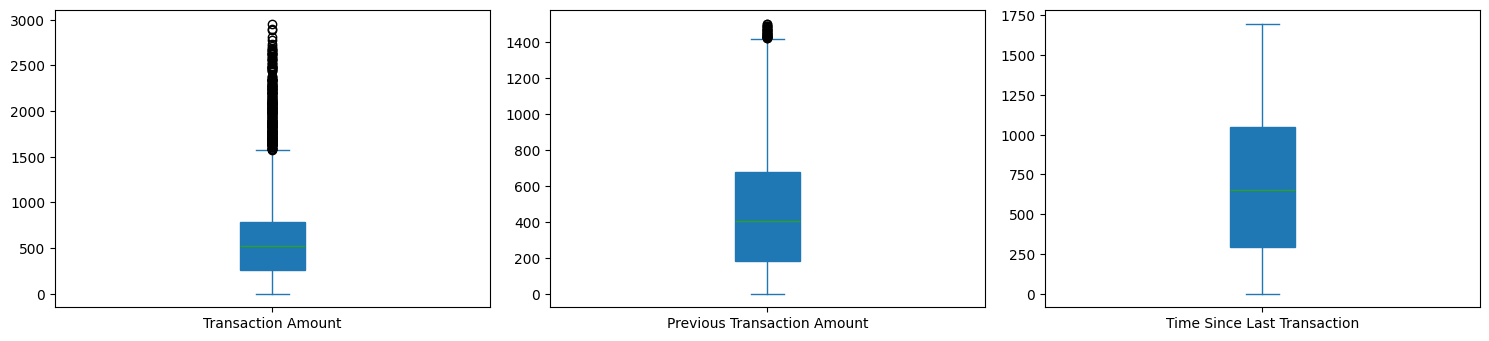

In [242]:
## several Boxplot in one graph
# List of variables of interest
variables_of_interest = ['Transaction Amount',
       'Previous Transaction Amount', 'Time Since Last Transaction']

# Create boxplots for each specified variable
df[variables_of_interest].plot(kind="box", subplots=True, layout=(3, 3), figsize=(15, 10), patch_artist=True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

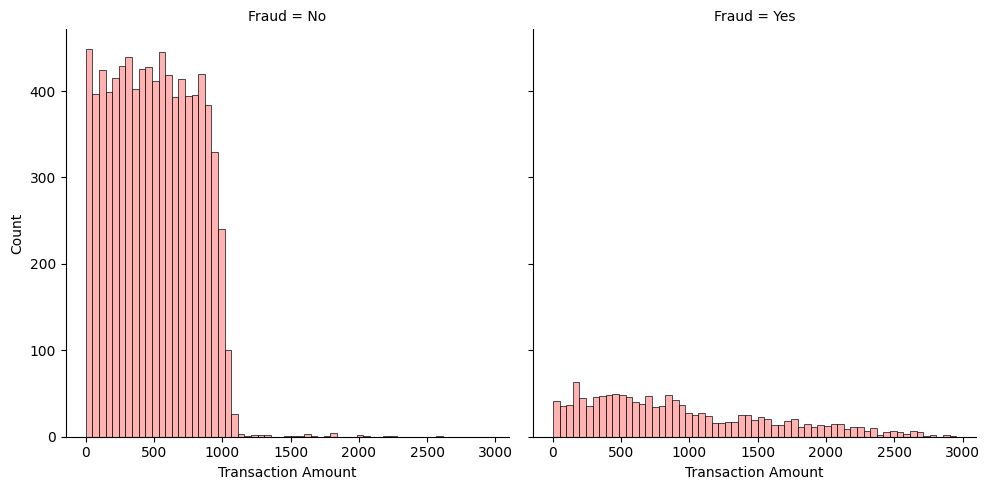

In [243]:
sns.displot(data=df,x='Transaction Amount',col='Fraud',color='#ff9999')


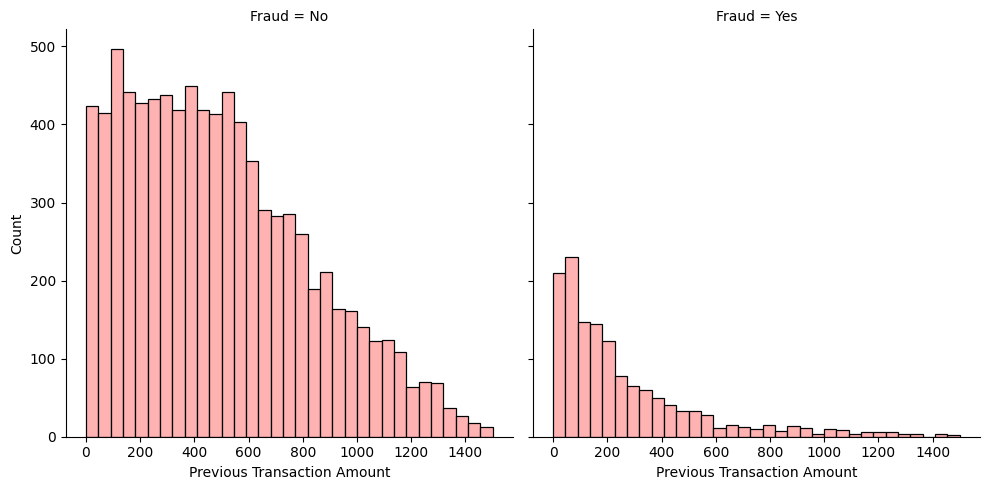

In [244]:
sns.displot(data=df,x='Previous Transaction Amount',col='Fraud',color='#ff9999')

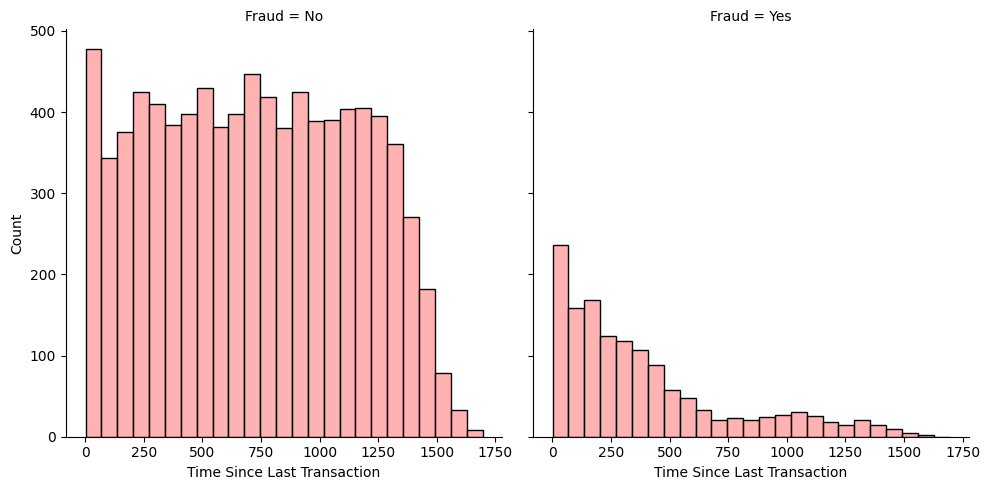

In [245]:
sns.displot(data=df,x='Time Since Last Transaction',col='Fraud',color='#ff9999')

In [246]:
# Define the numeric features and the target variable
numeric_features = ['Transaction Amount',
       'Previous Transaction Amount', 'Time Since Last Transaction','hour']
target = 'Fraud'

# Convert 'Attrition' to binary numerical values
df[target] = df[target].apply(lambda x: 1 if x == 'Yes' else 0)

# Perform t-tests for each numeric feature
t_test_results = []
for feature in numeric_features:
    no_attrition = df[df[target] == 0][feature]
    yes_attrition = df[df[target] == 1][feature]
    t_stat, p_value = ttest_ind(no_attrition, yes_attrition, equal_var=False)
    t_test_results.append({'Feature': feature, 't-statistic': t_stat, 'p-value': p_value})

# Convert t-test results to DataFrame for better readability
t_test_df = pd.DataFrame(t_test_results)
print("T-test results for numeric features:\n", t_test_df)

T-test results for numeric features:
                        Feature  t-statistic        p-value
0           Transaction Amount   -22.903248   1.221210e-99
1  Previous Transaction Amount    27.705389  3.637688e-144
2  Time Since Last Transaction    30.804217  2.153793e-171
3                         hour    -0.513467   6.076852e-01


In [247]:
df.columns

Index(['Transaction Amount', 'Transaction Date and Time', 'Merchant Category',
       'Location', 'Previous Transaction Amount',
       'Time Since Last Transaction', 'Device Type', 'Fraud', 'hour'],
      dtype='object')

In [248]:
# test whether the difference of yes answer rate in each 'department' is statistically significant
# Create a contingency table for 'Department' and 'Attrition'
contingency_table_dept = pd.crosstab(df['Merchant Category'], df['Fraud'])

# Perform Chi-Square test
chi2_dept, p_dept, dof_dept, expected_dept = stats.chi2_contingency(contingency_table_dept)

# Display the results
chi2_dept, p_dept

(np.float64(2.422844794447375), np.float64(0.6585028234725516))

In [249]:
# test whether the difference of yes answer rate in each 'department' is statistically significant
# Create a contingency table for 'Department' and 'Attrition'
contingency_table_dept = pd.crosstab(df['Location'], df['Fraud'])

# Perform Chi-Square test
chi2_dept, p_dept, dof_dept, expected_dept = stats.chi2_contingency(contingency_table_dept)

# Display the results
chi2_dept, p_dept

(np.float64(469.5569492557882), np.float64(2.567486407847484e-100))

In [250]:
# test whether the difference of yes answer rate in each 'department' is statistically significant
# Create a contingency table for 'Department' and 'Attrition'
contingency_table_dept = pd.crosstab(df['Device Type'], df['Fraud'])

# Perform Chi-Square test
chi2_dept, p_dept, dof_dept, expected_dept = stats.chi2_contingency(contingency_table_dept)

# Display the results
chi2_dept, p_dept

(np.float64(0.01652777685241005), np.float64(0.8977055011815493))

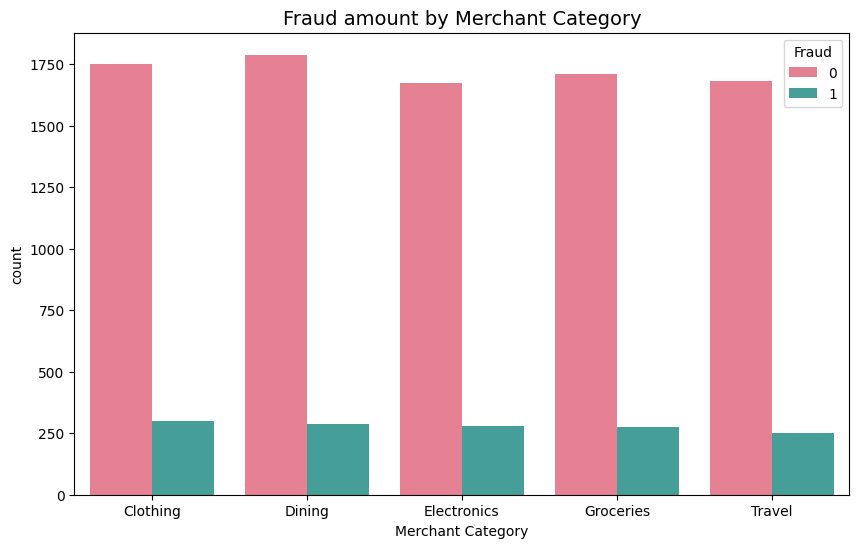

In [251]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Merchant Category', hue='Fraud', palette='husl')
plt.title('Fraud amount by Merchant Category', fontsize=14)
plt.show()

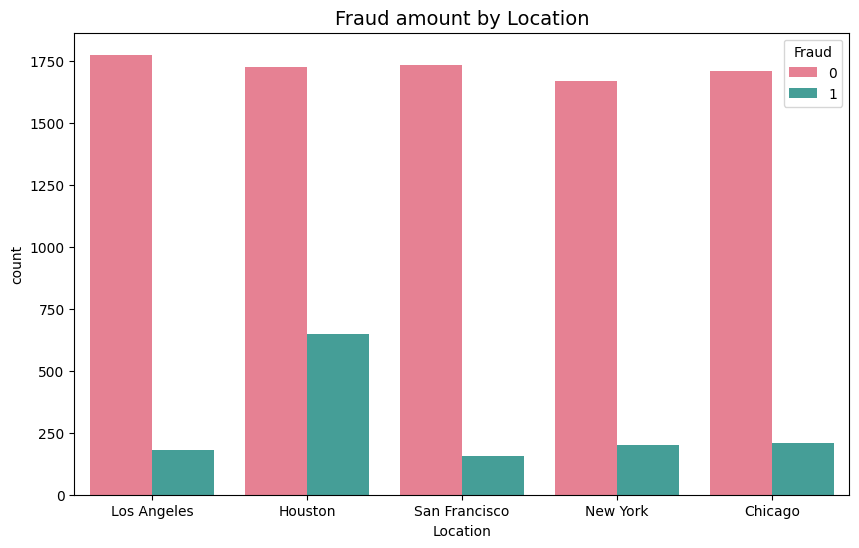

In [252]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Location', hue='Fraud', palette='husl')
plt.title('Fraud amount by Location', fontsize=14)
plt.show()

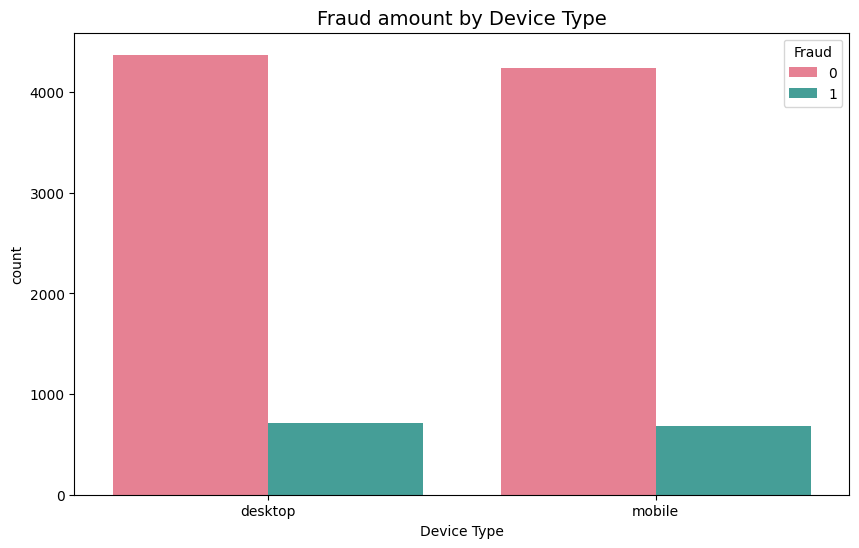

In [253]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Device Type', hue='Fraud', palette='husl')
plt.title('Fraud amount by Device Type', fontsize=14)
plt.show()

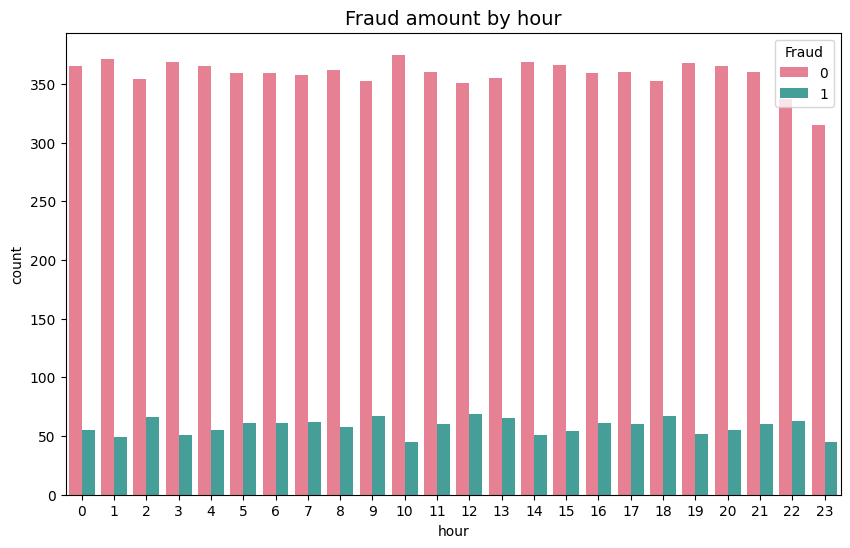

In [254]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='hour', hue='Fraud', palette='husl')
plt.title('Fraud amount by hour', fontsize=14)
plt.show()

First, I recreate the 'Transaction Date and Time' to day values and create one more variable which is the hour of the Transacion time.
Next, By checking the box plot of the three numerical variables in the dataset which are the 'Transaction Amount', 'Previous Transaction Amount' and 'Time Since Last Transaction', it shows that there are many outliers for the 'Transaction Amount', and some outliers for 'Previous Transaction Amount'. In this case, I am going to use log transformation to help reduce the outliers and divide the amounts into different ranges in the Feature Engineering part.
Then, I create the histogram for the count of Fraud of their responses of 'Yes' and 'No' by Merchant Category, Location, Device Type and Hour. From the histogram, we could find that there are not big differences between the Fraud response by Merchant Category, Device Type and Hour. But, the it shows obvious differences between different locations for the responses of Fraud, and especially in Houston that they have a much higher Fraud response with 'Yes'. Besides, I also check the p-value of the three categorical variables which are Merchant Category, Location and Device Type, and the results for Merchant Category, Location and Device Type are 0.6585, 2.5675e-100 and 0.8977. In this case, it also proves that only different locations will have much differences on the response of Fraud.
Besides, I also check the bar chart for the numerical variables which are 'Transaction Amount', 'Previous Transaction Amount', 'Time Since Last Transaction' and 'Hour' and by checking the p-values for these numerical variables, I find that 'Transaction Amount', 'Previous Transaction Amount' and 'Time Since Last Transaction' these three numerical variables will have much differences on the Fraud response that will have effects on the Fraud response.
Finally, by checking the correlation table, it also shows that 'Location', 'Time Since Last Transaction', 'Transaction Amount' and 'Previous Transaction Amount' will have effects on the response of Fraud. Then I am going to use these four variables in the final modelling after doing feature engineering.

In [255]:
### Feature Engineering

In [256]:
# Convert categorical data to numeric
Merchant_Category_le = LabelEncoder()
Location_le = LabelEncoder()
Device_Type_le = LabelEncoder()
Fraud_le = LabelEncoder()

df['Merchant Category'] = Merchant_Category_le.fit_transform(df['Merchant Category'])
df['Location'] = Location_le.fit_transform(df['Location'])
df['Device Type'] = Device_Type_le.fit_transform(df['Device Type'])
df['Fraud'] = Fraud_le.fit_transform(df['Fraud'])

In [257]:
df['Log_Transaction_Amount'] = np.log1p(df['Transaction Amount'])  
df['Log_Previous_Transaction_Amount'] = np.log1p(df['Previous Transaction Amount'])


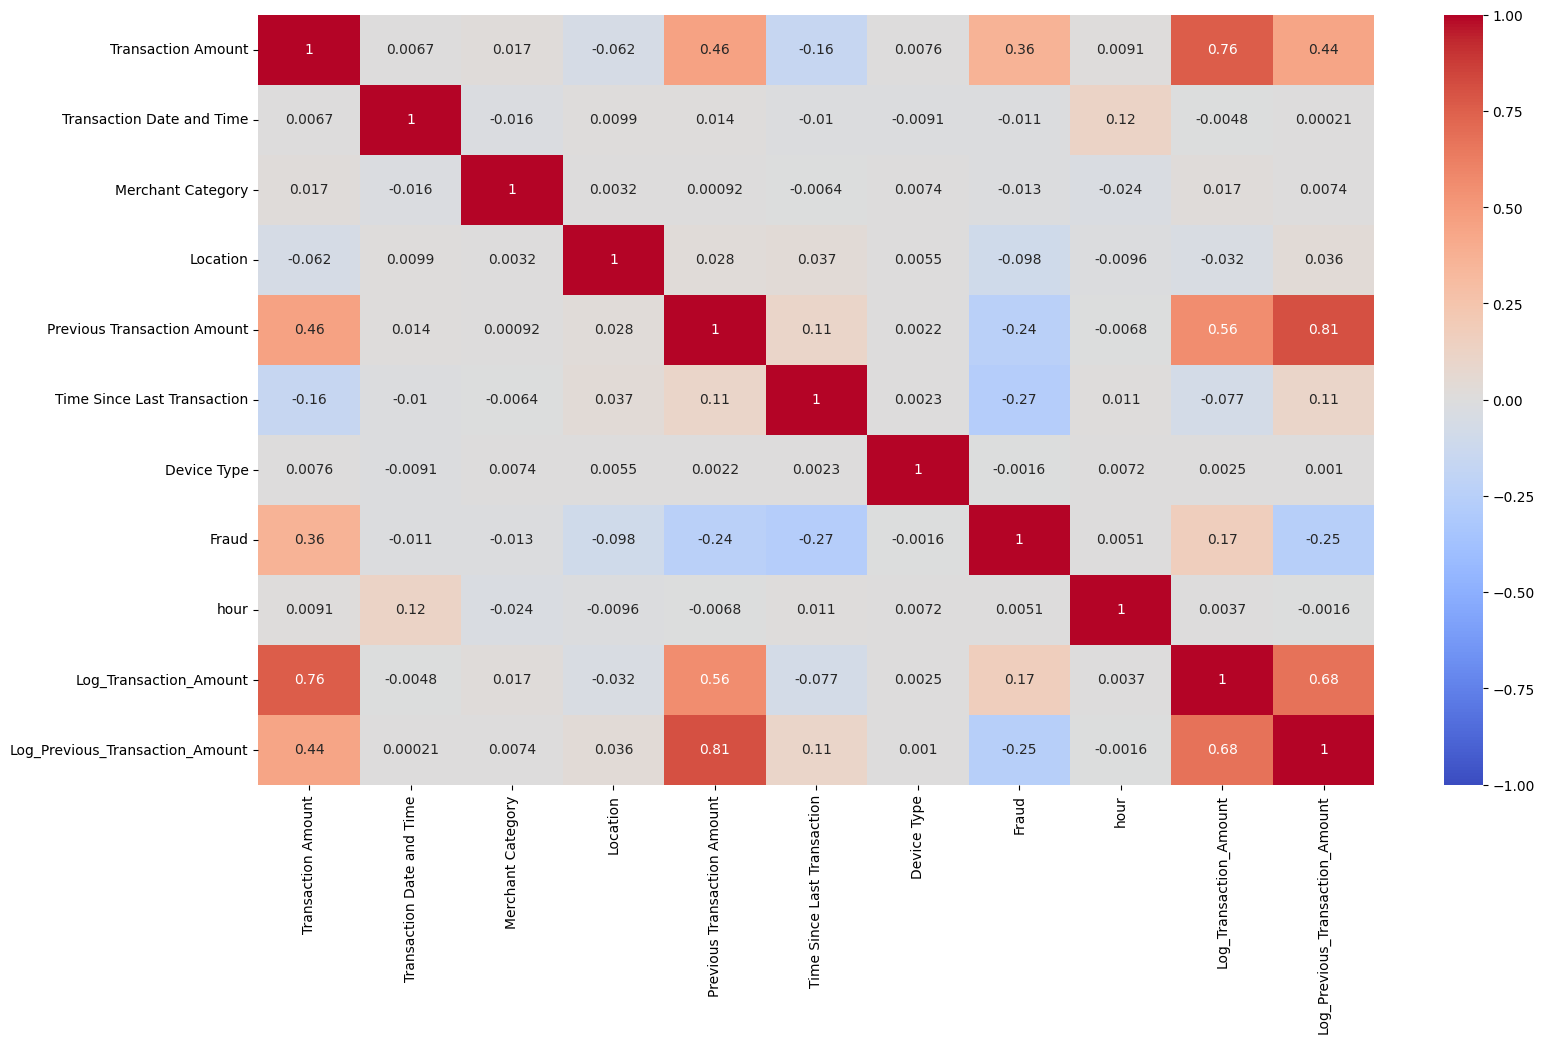

In [258]:
# Set the figure size for the heatmap
plt.figure(figsize=(18, 10))

# Create the heatmap
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

# Display the plot
plt.show()

First, I apply the onehotencoding to those categorical variables which are 'Merchant Category', 'Location', 'Device Type' and 'Fraud' to numerical variables for next modelling.
Next, since there are many outliers for the 'Transaction Amount' and 'Previous Transaction Amount'. In this case, I am going to apply the log transformation to 'Transaction Amount' and 'Previous Transaction Amount' to help solve the big number of outlier, and this can also help divide the values into ranges for better perforemence. Therefore, I am going to use 'Log_Transaction_Amount' and 'Log_Previous_Transaction_Amount' instead of 'Transaction Amount' and 'Previous Transaction Amount' for modelling. 

In [259]:
### Modelling

In [260]:
final_data = df

In [261]:
## split data into X variables and y variable

X = final_data[[  'Location',  'Time Since Last Transaction',
                 'Log_Transaction_Amount', 'Log_Previous_Transaction_Amount']]
y = final_data['Fraud']

In [262]:
# reserve 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [263]:
# demonstrate what MinMaxScaler() does
MinMaxScaler().fit_transform(final_data[['Time Since Last Transaction',
                 'Log_Transaction_Amount', 'Log_Previous_Transaction_Amount']])

array([[0.28362347, 0.79468631, 0.87006898],
       [0.68382852, 0.74956687, 0.82197155],
       [0.42491033, 0.75653251, 0.76370992],
       ...,
       [0.10962137, 0.83452584, 0.85824264],
       [0.0681007 , 0.        , 0.        ],
       [0.10756374, 0.6004076 , 0.68754128]])

In [264]:
# Define columns
numeric_columns = ['Time Since Last Transaction',
                 'Log_Transaction_Amount', 'Log_Previous_Transaction_Amount']
categorical_columns = [ 'Location']


In [265]:
# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

In [266]:
# we are going to test 5 models with cross validation to see which ones work best for this data
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = GaussianNB()
dt = DecisionTreeClassifier()

In [267]:
# Define scoring functions
scoring = {
    'accuracy': make_scorer(accuracy_score), 
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

In [268]:
# Cross-validation evaluation for KNN model
knn_scores = cross_validate(knn, X_train, y_train, scoring=scoring, cv=5)
knn_accuracy = np.mean(knn_scores['test_accuracy'])
knn_recall = np.mean(knn_scores['test_recall'])
knn_precision = np.mean(knn_scores['test_precision'])
knn_f1 = np.mean(knn_scores['test_f1'])

# Cross-validation evaluation for Logistic Regression model
logreg_scores = cross_validate(logreg, X_train, y_train, scoring=scoring, cv=5)
logreg_accuracy = np.mean(logreg_scores['test_accuracy'])
logreg_recall = np.mean(logreg_scores['test_recall'])
logreg_precision = np.mean(logreg_scores['test_precision'])
logreg_f1 = np.mean(logreg_scores['test_f1'])

# Cross-validation evaluation for Naive Bayes model
nb_scores = cross_validate(nb, X_train, y_train, scoring=scoring, cv=5)
nb_accuracy = np.mean(nb_scores['test_accuracy'])
nb_recall = np.mean(nb_scores['test_recall'])
nb_precision = np.mean(nb_scores['test_precision'])
nb_f1 = np.mean(nb_scores['test_f1'])

# Cross-validation evaluation for Random Forest model
rf_scores = cross_validate(rf, X_train, y_train, scoring=scoring, cv=5)
rf_accuracy = np.mean(rf_scores['test_accuracy'])
rf_recall = np.mean(rf_scores['test_recall'])
rf_precision = np.mean(rf_scores['test_precision'])
rf_f1 = np.mean(rf_scores['test_f1'])


# Cross-validation evaluation for Decision Tree model
dt_scores = cross_validate(dt, X_train, y_train, scoring=scoring, cv=5)
dt_accuracy = np.mean(dt_scores['test_accuracy'])
dt_recall = np.mean(dt_scores['test_recall'])
dt_precision = np.mean(dt_scores['test_precision'])
dt_f1 = np.mean(dt_scores['test_f1'])

In [269]:
print(f"Random Forest Mean Accuracy: {rf_accuracy}")
print(f"Random Forest Mean Recall: {rf_recall}")
print(f"Random Forest Mean Precision: {rf_precision}")
print(f"Random Forest Mean F1 Score: {rf_f1}")

print(f"KNN Mean Accuracy: {knn_accuracy}")
print(f"KNN Mean Recall: {knn_recall}")
print(f"KNN Mean Precision: {knn_precision}")
print(f"KNN Mean F1 Score: {knn_f1}")

print(f"Logistic Regression Mean Accuracy: {logreg_accuracy}")
print(f"Logistic Regression Mean Recall: {logreg_recall}")
print(f"Logistic Regression Mean Precision: {logreg_precision}")
print(f"Logistic Regression Mean F1 Score: {logreg_f1}")

print(f"Naive Bayes Mean Accuracy: {nb_accuracy}")
print(f"Naive Bayes Mean Recall: {nb_recall}")
print(f"Naive Bayes Mean Precision: {nb_precision}")
print(f"Naive Bayes Mean F1 Score: {nb_f1}")

print(f"Decision Tree Mean Accuracy: {dt_accuracy}")
print(f"Decision Tree Mean Recall: {dt_recall}")
print(f"Decision Tree Mean Precision: {dt_precision}")
print(f"Decision Tree Mean F1 Score: {dt_f1}")


Random Forest Mean Accuracy: 0.9399999999999998
Random Forest Mean Recall: 0.6230039084310441
Random Forest Mean Precision: 0.9309074992594164
Random Forest Mean F1 Score: 0.7460604169811637
KNN Mean Accuracy: 0.8797142857142857
KNN Mean Recall: 0.2802497335160652
KNN Mean Precision: 0.6890356136177006
KNN Mean F1 Score: 0.3960456161209552
Logistic Regression Mean Accuracy: 0.931
Logistic Regression Mean Recall: 0.5786152987158013
Logistic Regression Mean Precision: 0.8993125674915173
Logistic Regression Mean F1 Score: 0.7036560170704791
Naive Bayes Mean Accuracy: 0.8720000000000001
Naive Bayes Mean Recall: 0.1935130196436729
Naive Bayes Mean Precision: 0.6746621712218138
Naive Bayes Mean F1 Score: 0.2998564867711161
Decision Tree Mean Accuracy: 0.8805714285714286
Decision Tree Mean Recall: 0.5957768641185727
Decision Tree Mean Precision: 0.5760303381972447
Decision Tree Mean F1 Score: 0.5856110445891372


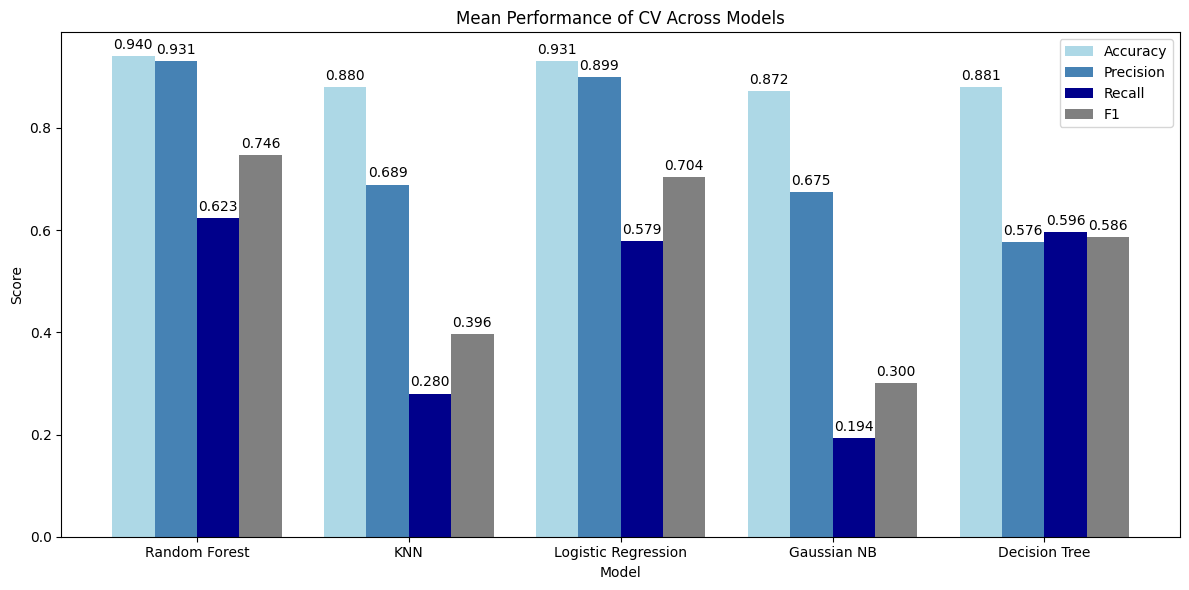

In [270]:
# Collect the scores in a dictionary
scores = {
    'Random Forest': {
        'Accuracy': rf_accuracy,
        'Precision': rf_precision,
        'Recall': rf_recall,
        'F1': rf_f1
    },
     'KNN': {
        'Accuracy': knn_accuracy,
        'Precision': knn_precision,
        'Recall': knn_recall,
        'F1': knn_f1
    },
    'Logistic Regression': {
        'Accuracy': logreg_accuracy,
        'Precision': logreg_precision,
        'Recall': logreg_recall,
        'F1': logreg_f1
    },
    'Gaussian NB': {
        'Accuracy': nb_accuracy,
        'Precision': nb_precision,
        'Recall': nb_recall,
        'F1': nb_f1
    },
    'Decision Tree': {
        'Accuracy': dt_accuracy,
        'Precision': dt_precision,
        'Recall': dt_recall,
        'F1': dt_f1
    }

}

# Data preparation for plotting
models = list(scores.keys())
metrics = list(next(iter(scores.values())).keys())
accuracy_scores = [scores[model]['Accuracy'] for model in models]
precision_scores = [scores[model]['Precision'] for model in models]
recall_scores = [scores[model]['Recall'] for model in models]
f1_scores = [scores[model]['F1'] for model in models]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy', color='lightblue')
rects2 = ax.bar(x - 0.5*width, precision_scores, width, label='Precision', color='steelblue')
rects3 = ax.bar(x + 0.5*width, recall_scores, width, label='Recall', color='darkblue')
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1', color='grey')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Mean Performance of CV Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Attach a text label above each bar in *rects*, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

By checking all four results for Accuracy, Precision, Recall and F1 scores for the five models. I find that the accuracy for the five models are all high enough. However, the Recall results are different. KNN model and Naive Bayes only have Recall for 0.280 and 0.194 which are really low to predict the positive predictions to the total number of actual positive samples. And Random Forst, Logistic Regression and Decision Tree have Recall results of 0.623, 0.579 and 0.596. Besides, the F1 scores for random forest and logistic regression and decision tree which are 0.746, 0.704 and 0.586 are not as small as KNN and Naive bayes whcih are 0.396 and 0.300. Finally, by checking the precision from the results, it shows that random forest and logistic regression have high precision values which are 0.931 and 0.899. And KNN and Naive Bayes have a little lower precision results which are 0.689 and 0.675. And the decision tree has the lowest precision number which is 0.576.

In [271]:
## KNN 

In [272]:
# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

In [273]:
# Create a pipeline with a preprocessor and KNN model
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])


# Define hyperparameter grid
param_grid = {
    'classifier__n_neighbors': [5, 7, 9, 15, 35, 45, 55],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for KNN:", grid_search.best_params_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


Best hyperparameters for KNN: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__weights': 'distance'}


In [274]:
# Build the final KNN model using the best hyperparameters
final_classifier = KNeighborsClassifier(
    n_neighbors=grid_search.best_params_['classifier__n_neighbors'],
    metric=grid_search.best_params_['classifier__metric'],
    weights=grid_search.best_params_['classifier__weights']
)

# Build the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_classifier)
])

# Train the final model
final_pipeline.fit(X_train, y_train)

# Predict on the test set
pred = final_pipeline.predict(X_test)
probs = final_pipeline.predict_proba(X_test)

# Evaluate model performance with weighted metrics
test_accuracy = accuracy_score(y_test, pred)
test_f1 = f1_score(y_test, pred)
test_precision = precision_score(y_test, pred)
test_recall = recall_score(y_test, pred)

print(f"Final Model Test Accuracy: {test_accuracy}")
print(f"Final Model Test F1 Score : {test_f1}")
print(f"Final Model Test Precision : {test_precision}")
print(f"Final Model Test Recall : {test_recall}")


Final Model Test Accuracy: 0.94
Final Model Test F1 Score : 0.7280966767371602
Final Model Test Precision : 0.9198473282442748
Final Model Test Recall : 0.6025


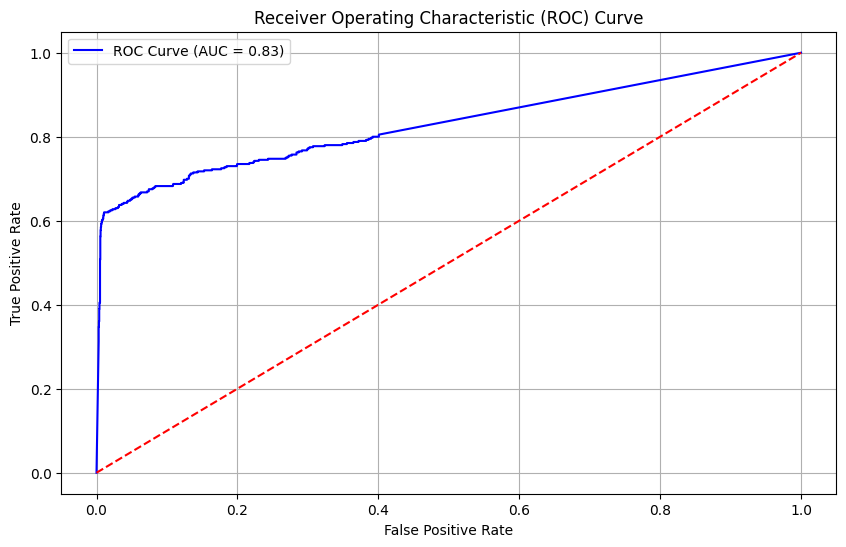

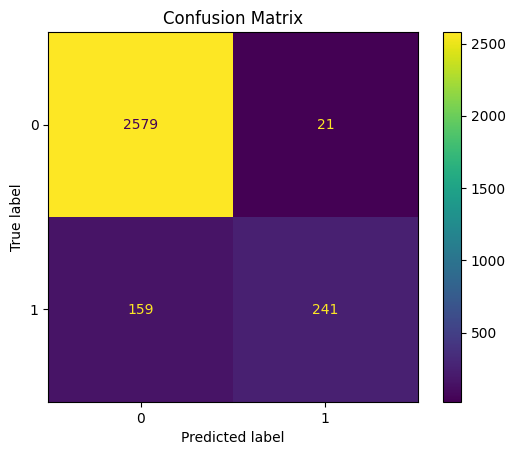

In [275]:
# Calculate ROC curve and AUC score
y_pred_prob = final_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

In [276]:
## Logistic Regression

In [277]:
# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Create a pipeline with a preprocessor and Logistic Regression model
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg)
])

# Define the hyperparameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__solver': ['saga']  # saga solver supports l1, l2, and elasticnet
}


# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)


# Output the best hyperparameter combination
print("Best hyperparameters for Logistic Regression:", grid_search.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


Best hyperparameters for Logistic Regression: {'classifier__C': 10, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}


/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimat

In [278]:
# Build the final Logistic Regression model using the best hyperparameters
final_classifier = LogisticRegression(
    C=grid_search.best_params_['classifier__C'],
    penalty=grid_search.best_params_['classifier__penalty'],
    solver=grid_search.best_params_['classifier__solver'],
    max_iter=1000
)

# Build the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_classifier)
])

# Train the final model
final_pipeline.fit(X_train, y_train)

# Predict on the test set
pred = final_pipeline.predict(X_test)
probs = final_pipeline.predict_proba(X_test)

# Evaluate model performance
test_accuracy = accuracy_score(y_test, pred)
test_f1 = f1_score(y_test, pred)
test_precision = precision_score(y_test, pred)
test_recall = recall_score(y_test, pred)

print(f"Final Model Test Accuracy: {test_accuracy}")
print(f"Final Model Test F1 Score: {test_f1}")
print(f"Final Model Test Precision: {test_precision}")
print(f"Final Model Test Recall: {test_recall}")

Final Model Test Accuracy: 0.9323333333333333
Final Model Test F1 Score: 0.693815987933635
Final Model Test Precision: 0.8745247148288974
Final Model Test Recall: 0.575


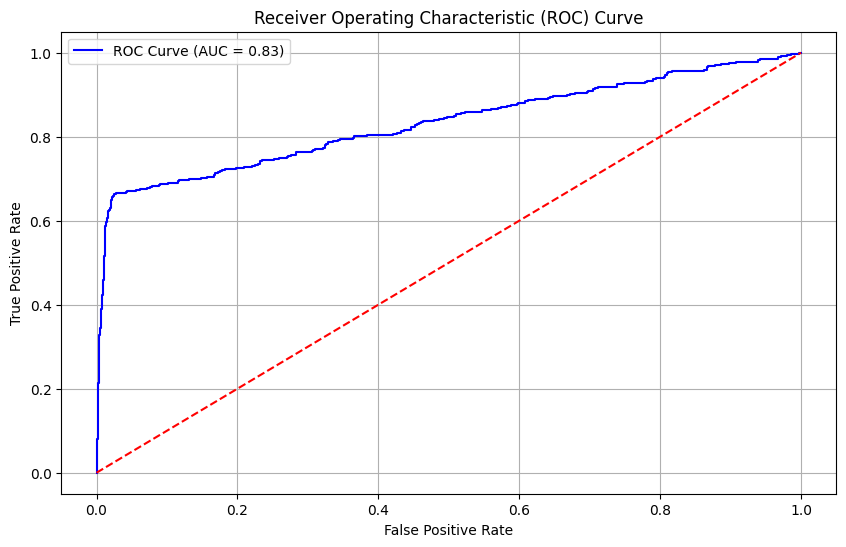

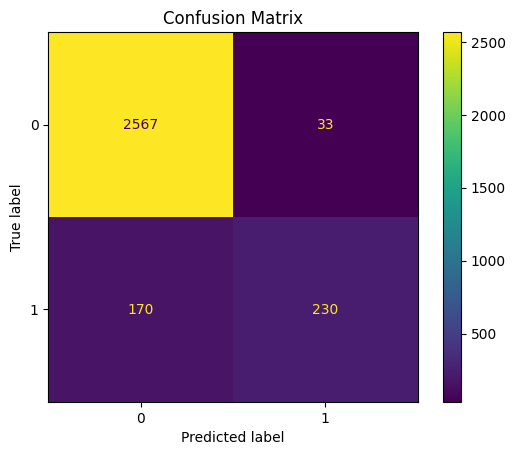

In [279]:
# Calculate ROC curve and AUC score
y_pred_prob = final_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()


In [280]:
## Naive Bayes 

In [281]:
# Define the Naive Bayes model
nb_model = GaussianNB()

# Create a pipeline with a preprocessor and Naive Bayes model
nb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', nb_model)
])


# Define the hyperparameter grid
param_grid = {
    'classifier__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]
}


# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(nb_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for Naive Bayes:", grid_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best hyperparameters for Naive Bayes: {'classifier__var_smoothing': 1e-09}


In [282]:
# Build the final Naive Bayes model using the best hyperparameters
final_classifier = GaussianNB(var_smoothing=grid_search.best_params_['classifier__var_smoothing'])

# Build the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_classifier)
])

# Train the final model
final_pipeline.fit(X_train, y_train)

# Predict on the test set
pred = final_pipeline.predict(X_test)
probs = final_pipeline.predict_proba(X_test)

# Evaluate model performance
test_accuracy = accuracy_score(y_test, pred)
test_f1 = f1_score(y_test, pred)
test_precision = precision_score(y_test, pred)
test_recall = recall_score(y_test, pred)

print(f"Final Model Test Accuracy: {test_accuracy}")
print(f"Final Model Test F1 Score: {test_f1}")
print(f"Final Model Test Precision: {test_precision}")
print(f"Final Model Test Recall: {test_recall}")

Final Model Test Accuracy: 0.8456666666666667
Final Model Test F1 Score: 0.44550898203592815
Final Model Test Precision: 0.42758620689655175
Final Model Test Recall: 0.465


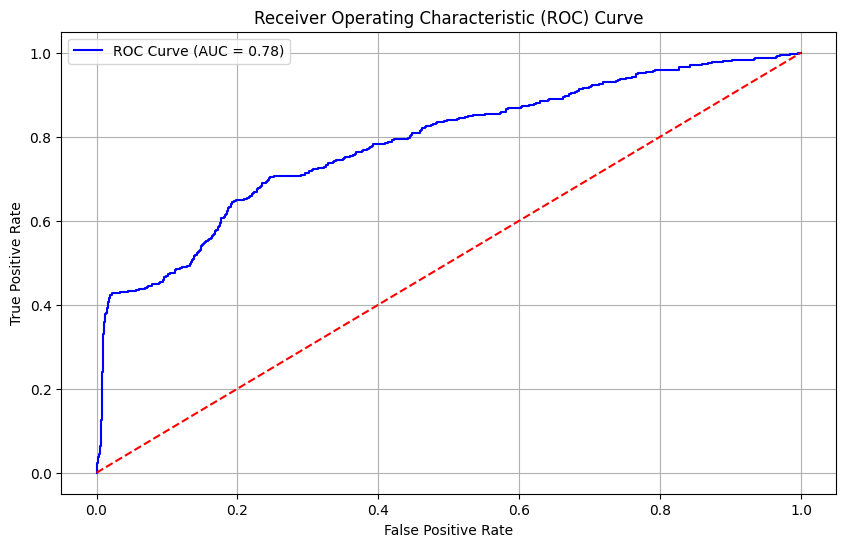

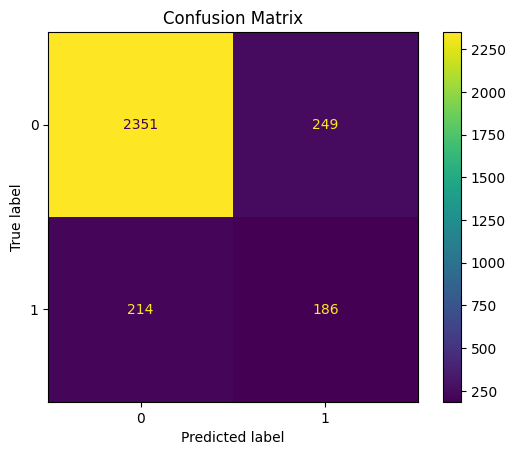

In [283]:
# Calculate ROC curve and AUC score
y_pred_prob = final_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

In [284]:
## Decision Tree

In [285]:
# Create a Decision Tree model
dt = DecisionTreeClassifier(random_state=123)

# Create a pipeline with a preprocessor and Decision Tree model
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', dt)
])

# Define the hyperparameter grid with the correct references to the pipeline steps
param_grid = {
    'classifier__max_depth': [2, 3, 4, 5, 6],
    'classifier__min_samples_split': [8, 10, 15, 20],
    'classifier__min_samples_leaf': [4, 8, 10, 20]
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search_dt = GridSearchCV(dt_pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search_dt.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for Decision Tree:", grid_search_dt.best_params_)



Fitting 5 folds for each of 80 candidates, totalling 400 fits


Best hyperparameters for Decision Tree: {'classifier__max_depth': 6, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 8}


In [286]:
# Build the final Decision Tree model using the best hyperparameters from the new grid
final_dt_classifier = DecisionTreeClassifier(
    max_depth=grid_search_dt.best_params_['classifier__max_depth'],
    min_samples_split=grid_search_dt.best_params_['classifier__min_samples_split'],
    min_samples_leaf=grid_search_dt.best_params_['classifier__min_samples_leaf'],
    random_state=123
)

# Build the final pipeline
final_dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', final_dt_classifier)
])

# Train the final model
final_dt_pipeline.fit(X_train, y_train)

# Predict on the test set
pred_dt = final_dt_pipeline.predict(X_test)
probs_dt = final_dt_pipeline.predict_proba(X_test)



In [287]:
# Evaluate model performance
dt_test_accuracy = accuracy_score(y_test, pred_dt)
dt_test_f1 = f1_score(y_test, pred_dt)
dt_test_precision = precision_score(y_test, pred_dt)
dt_test_recall = recall_score(y_test, pred_dt)

print(f"Final Decision Tree Model Test Accuracy: {dt_test_accuracy}")
print(f"Final Decision Tree Model Test F1 Score: {dt_test_f1}")
print(f"Final Decision Tree Model Test Precision: {dt_test_precision}")
print(f"Final Decision Tree Model Test Recall: {dt_test_recall}")


Final Decision Tree Model Test Accuracy: 0.94
Final Decision Tree Model Test F1 Score: 0.7247706422018348
Final Decision Tree Model Test Precision: 0.9330708661417323
Final Decision Tree Model Test Recall: 0.5925


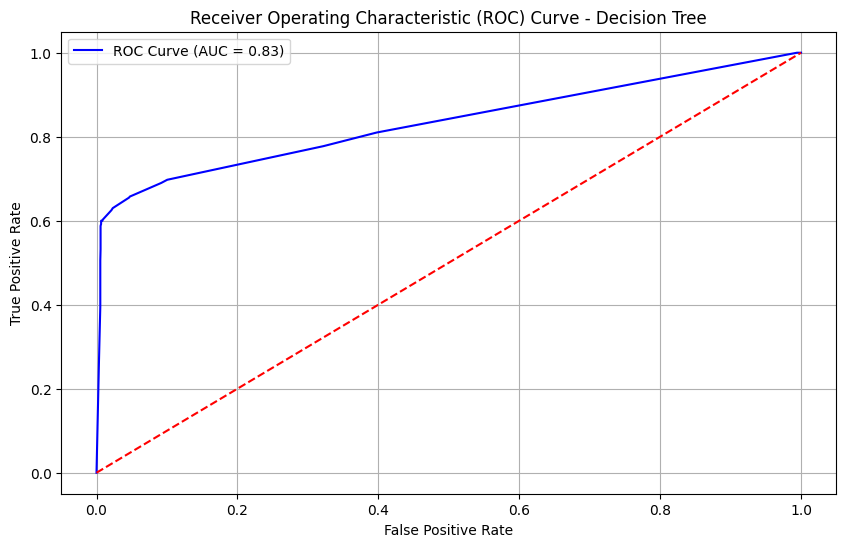

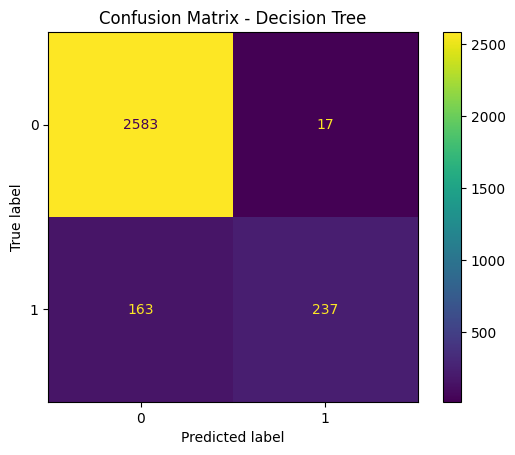

In [288]:
# Calculate ROC curve and AUC score
y_pred_prob_dt = final_dt_pipeline.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', label=f'ROC Curve (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend()
plt.grid()
plt.show()

# Plot confusion matrix
conf_matrix_dt = confusion_matrix(y_test, pred_dt)
ConfusionMatrixDisplay(conf_matrix_dt).plot()
plt.title('Confusion Matrix - Decision Tree')
plt.show()


After doing the the hyperparameter grid for the four models which are KNN, Logisitc Regression, Naive Bayes and Decision Tree and based on the results befroe doing the hyperparameter grid. I am going to focus on the decision tree model, since it has the better results on befer doing hyperparameter grid and it also has the largest Precision number which is 0.933 and the higher ROC AUC number which is 0.83. And after the grid search, the accuracy increase by 0.06, the recall does not increase a lot by 0.01, but the precision result is increasing of 0.35 and the F1 score is also increasing of 0.14. Therefore, by using the hyperparameter grid search, it shows that the decision tree model is better than the model before doing hyperparameter grid search.
In this case, we will have enough evidence to predict the Fraud by using the predictors of 'Location',  'Time Since Last Transaction', 'Log_Transaction_Amount' and 'Log_Previous_Transaction_Amount'. By collecting enough data, and using the reasonable variables to help predict the Fraud, this model could help minimize the number of fraudulent transactions that go undetected while also reducing the number of legitimate transactions flagged as fraud. 